In [116]:
# import libs
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
import chardet

with open('RetailSales.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
df = pd.read_csv('RetailSales.csv', encoding=encoding)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [118]:
# the only country here is United States so keep this column would yield no beneficial insights 
df.drop(['Country', 'Postal Code','Row ID'], axis=1, inplace=True)

In [119]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

### DATA CLEANING

In [120]:
print("DATASET INFORMATION")
print("The Dataset has {} columns and {} rows.".format(df.shape[1], df.shape[0]))
print("The DataFrame has {} duplicated values and {} missing values.".format(df.duplicated().sum(), df.isnull().sum().sum()))
df.info()


DATASET INFORMATION
The Dataset has 18 columns and 9994 rows.
The DataFrame has 1 duplicated values and 0 missing values.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   City           9994 non-null   object 
 8   State          9994 non-null   object 
 9   Region         9994 non-null   object 
 10  Product ID     9994 non-null   object 
 11  Category       9994 non-null   object 
 12  Sub-Category   9994 non-null   object 
 13  Product Name   9994 non-null   object 
 14  Sales          9994 non-null   float64
 15  Quantity       999

In [ ]:
df.drop_duplicates(inplace=True)

In [129]:
d= df.describe()
d

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971
std,623.276074,2.225149,0.206457,234.271476
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.731000
50%,54.480000,3.000000,0.200000,8.671000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


### Insights: 
- Looking at this stastical summary, it is clear that the profit of our company is relative low compared to the sales and quantity of products sold. Furthermore, the profit contains lots of negative values, which is worth noticing. 
- In this case, we should re evaluate our pricing strategy, and other aspects of our products to increase the profit 

Text(0.5, 1.0, 'Bar plot of the count of features')

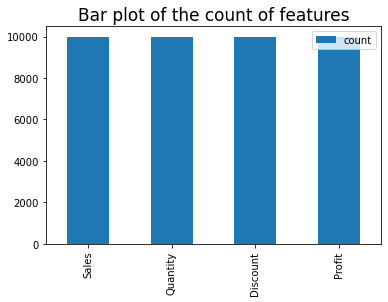

In [126]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of features",fontsize=17)

### Order Date is now a object datatype, we need to convert it into a datetime data


array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

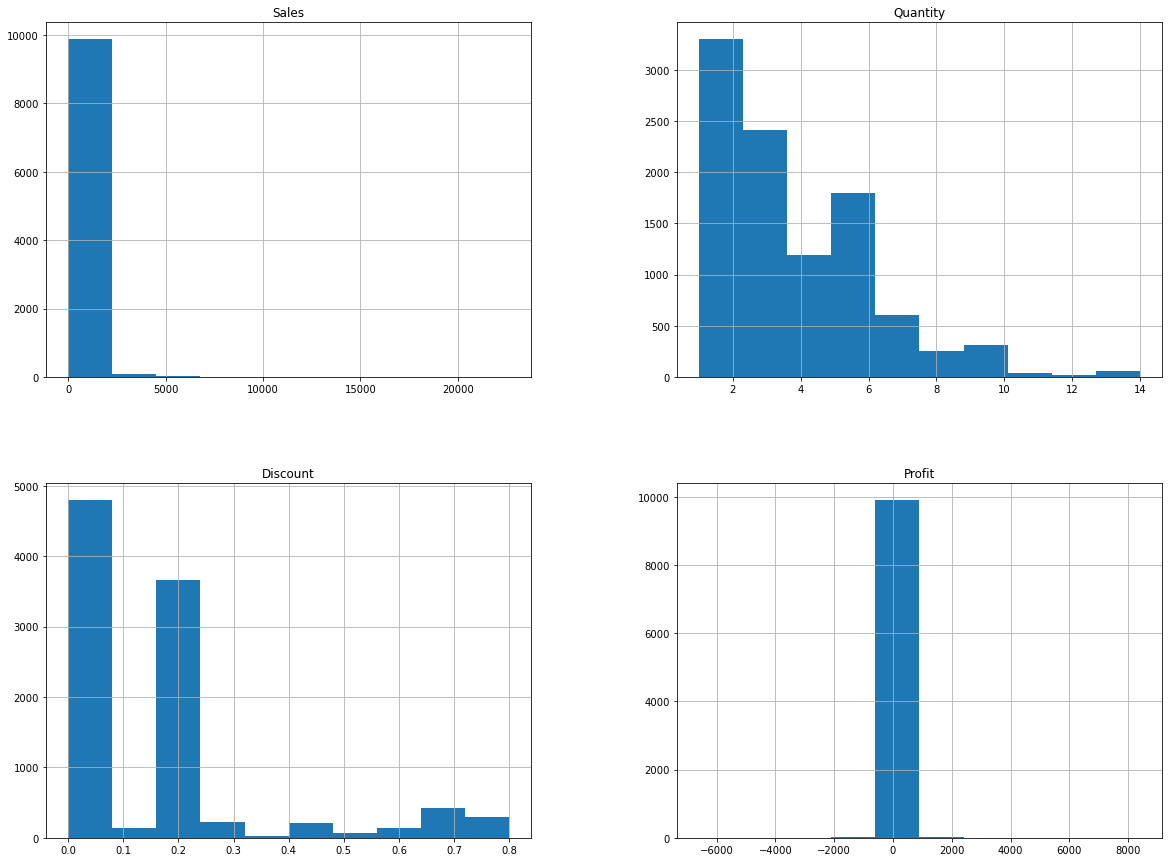

In [128]:
## histogram map 
%matplotlib inline
from matplotlib import pyplot as plt
df.hist(figsize=(20, 15))

### Histogram Intepretation: 
- It is evident that all numberic columns of our data set is not normally distributed. Column Sales, Profit and quantity exists some suspected outliers, however to be more sure of our conclusion, we'll plot a box plot of these features, and 

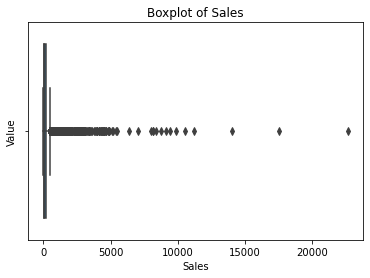

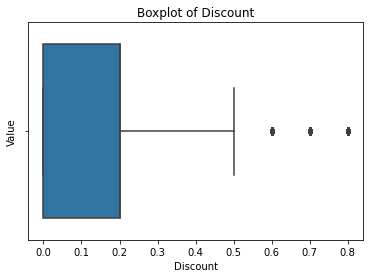

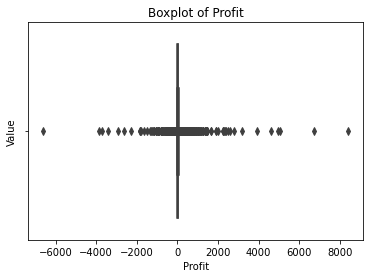

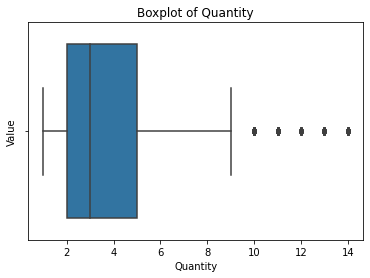

In [123]:
# boxplot for our numberical features 
feature_names=['Sales','Discount','Profit','Quantity']
for feature in feature_names:
    plt.figure()
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Value')

plt.show()